<h2 style=" background-color: #0065a3;font-family:serif;font-size:350%;color: #fff;text-align:center;"> <u>Credit Card Customer Churn </u> <br/>Data Analysis and Classification </h2>

<div style="display: flex;">
    <div style="width: 50%; padding-right: 10px;">
        
### Plan
* [1. Context](#1)
    * [1.1 Description and framework of the project ](#1.1)
    * [1.2 Dataset insight](#1.2)
    * [1.3 Technologies and libraries used](#1.3)
* [2. Data Preparation](#1)
    * [1.3 import libraries and Load the Data](#1.3)
    * [1.4 Dataset Description](#1.4)
* [3. Data Analysis](#2)
    * [2.1 Data Munging](#2.1)
    * [2.2 Eda (Exploratory Data Analysis)](#2.2)
* [4. Data Preprocessing](#3)
    * [3.1 Data Upsampling Using SMOTE](#3.1)
    * [3.2 Principal Component Analysis Of One Hot Encoded Data](#3.2)  
* [5. Model Selection And Evaluation](#4) 
    * [4.1 Cross Validation](#4.1)
    * [4.2 Model Evaluation](#4.2)
    * [4.3 Model Evaluation On Original Data (Before Upsampling)](#4.3)
* [6. Results](#5)

    </div>
    <div style="width: 50%; padding-left: 10px;">
![](https://smartasset.com/wp-content/uploads/sites/2/2016/11/churning-1-1.jpg)
    </div>
</div>


😀
👍
📊
📈
🧐

<a id="1"></a>
<center> 

## 1. Context
</center>

<a id="1.1"></a> <p>

### 1.1 Description and framework of the project
   Within a banking context, there is concern over a growing trend of customers discontinuing their credit card services. The primary objective is to delve into detailed data analysis to uncover insights about customer characteristics associated with churn. This analysis will serve as a foundation for predicting churn and enhancing proactive customer retention strategies. </p>

<a id="1.2"></a> <p>
    
### 1.2 Dataset Insight
The dataset encompasses information from 10,000 customers, encompassing diverse attributes such as age, salary, marital status, credit card limit, category, and more. This comprehensive dataset, named "Credit Card Customers," is sourced from Kaggle (<a target=”_blank” href="https://shorturl.at/E45oG">click here to download</a>), offering ample opportunities for detailed exploratory analysis and visualization. </p>

<a id="1.3"></a> <p>

### 1.3 Technologies and libraries used:

</p>

* CLIENTNUM > Client number, Unique identifier for the customer holding the account.
* Attrition_Flag > Internal event (customer activity) variable - if the account is closed then 1 else 0.
* Customer_Age > Demographic variable - Customer’s Age in Years.
* Gender > Demographic variable - M=Male, F=Female.
* Dependent_count > Demographic variable - Number of dependents.  Number of dependents a user has. That is, how many people are dependent on a credit card user for financial support. A higher count tells us that the expenditures can be high.
* Education_Level > Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.).
* Marital_Status > Demographic variable - Married, Single, Divorced, Unknown
* Income_Category > Demographic variable - Annual Income Category of the account holder
* Card_Category > Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
* Months_on_book > Period of relationship with bank.
* Total_Relationship_Count > Total no. of products held by the customer.
* Months_Inactive_12_mon > No. of months inactive in the last 12 months.
* Contacts_Count_12_mon > No. of Contacts in the last 12 months.
* Credit_Limit > Credit Limit on the Credit Card.
* Total_Revolving_Bal > With revolving credit, a consumer has a line of credit he can keep using and repaying over and over. The balance that carries over from one month to the next is the revolving balance on that loan.
* Avg_Open_To_Buy > Open to Buy Credit Line (Average of last 12 months). 
* Total_Amt_Chng_Q4_Q1 > Change in Transaction Amount (Q4 over Q1).
* Total_Trans_Amt > Total Transaction Amount (Last 12 months).
* Total_Trans_Ct > Total Transaction Count (Last 12 months).
* Total_Ct_Chng_Q4_Q1 > Change in Transaction Count (Q4 over Q1).
* Avg_Utilization_Ratio > Average Card Utilization Ratio.

In [34]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 

from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


In [2]:
# lets start by reading the data from the CSV file, do some checking and then an Exploratory Data Analysis
bank_raw_data = pd.read_csv('BankChurners.csv')
bank_raw_data = bank_raw_data.iloc[:,:-2] #due to the specification of the publisher of the database, the last two columns should be removed
bank_raw_data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

In [3]:
bank_raw_data.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [4]:
for column in bank_raw_data.columns:
    print(bank_raw_data[[column]].nunique())

CLIENTNUM    10127
dtype: int64
Attrition_Flag    2
dtype: int64
Customer_Age    45
dtype: int64
Gender    2
dtype: int64
Dependent_count    6
dtype: int64
Education_Level    7
dtype: int64
Marital_Status    4
dtype: int64
Income_Category    6
dtype: int64
Card_Category    4
dtype: int64
Months_on_book    44
dtype: int64
Total_Relationship_Count    6
dtype: int64
Months_Inactive_12_mon    7
dtype: int64
Contacts_Count_12_mon    7
dtype: int64
Credit_Limit    6205
dtype: int64
Total_Revolving_Bal    1974
dtype: int64
Avg_Open_To_Buy    6813
dtype: int64
Total_Amt_Chng_Q4_Q1    1158
dtype: int64
Total_Trans_Amt    5033
dtype: int64
Total_Trans_Ct    126
dtype: int64
Total_Ct_Chng_Q4_Q1    830
dtype: int64
Avg_Utilization_Ratio    964
dtype: int64


In [5]:
# so at a quick check of the uniqueness of the data, we could see that CLIENTNUM is unique thus can be removed from the analysis
bank_raw_data.drop(["CLIENTNUM"], axis=1 , inplace = True)
bank_raw_data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

## Data Manipulation and Eploration

## Data Manipulation 

In [6]:
# Attrition_Flag represent our target variable, according to the dataset description, it's 0 when the account is open and 1 when not closed
# let's check is distribution
print(f"The dataset contains the following unique values : {bank_raw_data['Attrition_Flag'].unique()}")

map = { 'Attrited Customer': 1 , 'Existing Customer': 0 }
bank_raw_data['Churn'] = bank_raw_data['Attrition_Flag'].map(map)
bank_raw_data.drop('Attrition_Flag', axis=1, inplace=True)

print(f"After transormation The dataset contains the following unique values : {bank_raw_data['Churn'].unique()}")

The dataset contains the following unique values : ['Existing Customer' 'Attrited Customer']
After transormation The dataset contains the following unique values : [0 1]


In [7]:
#check if there is any void values in the data set 
bank_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

<h4 style="font-style : italic;">🧐 As can be seen from the dataset there were no null values</h4>

In [8]:
def show_distinct_values(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        distinct_values = df[column].unique()
        print(f"Column '{column}': {distinct_values}")

# let's check Income Category
show_distinct_values(bank_raw_data)

Column 'Gender': ['M' 'F']
Column 'Education_Level': ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Column 'Marital_Status': ['Married' 'Single' 'Unknown' 'Divorced']
Column 'Income_Category': ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Column 'Card_Category': ['Blue' 'Gold' 'Silver' 'Platinum']


<h4 style="font-style : italic;">🧐 We can notice that "Education level" ,  "Martial Status" and "Income_category" has unknown values. <br/>
🍀➡️Let's have a look at the concerned data and see what proportion of the dataset is concerned
</h4>

In [9]:
for col in ["Education_Level", "Marital_Status", "Income_Category"]:
    print(bank_raw_data[col].value_counts())

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


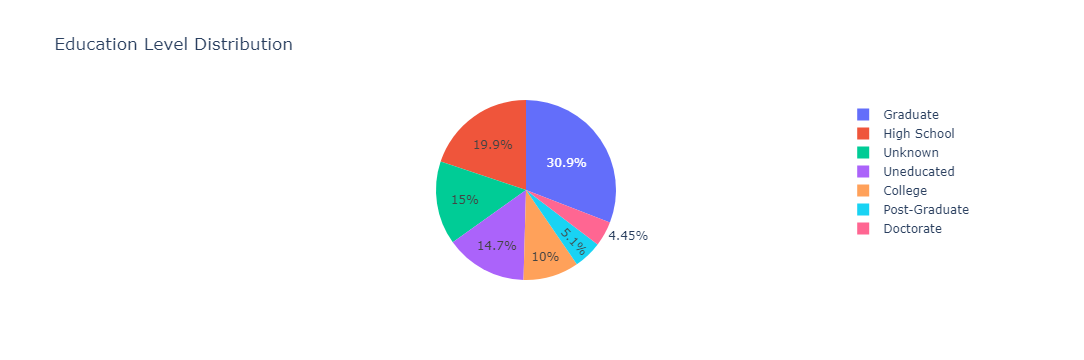

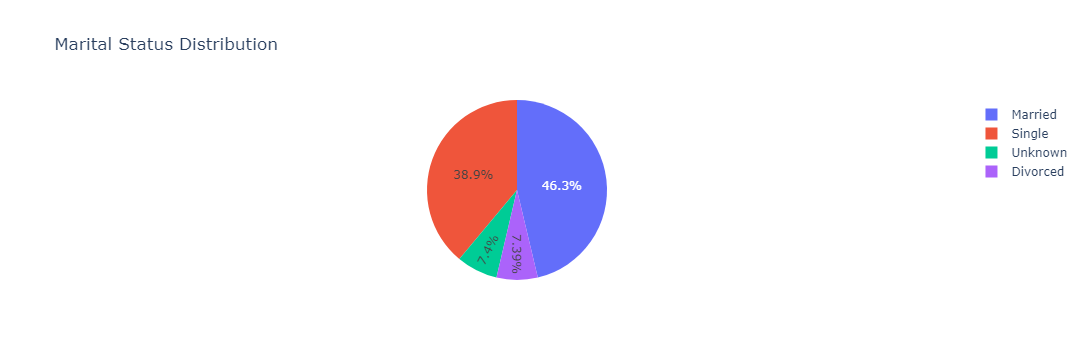

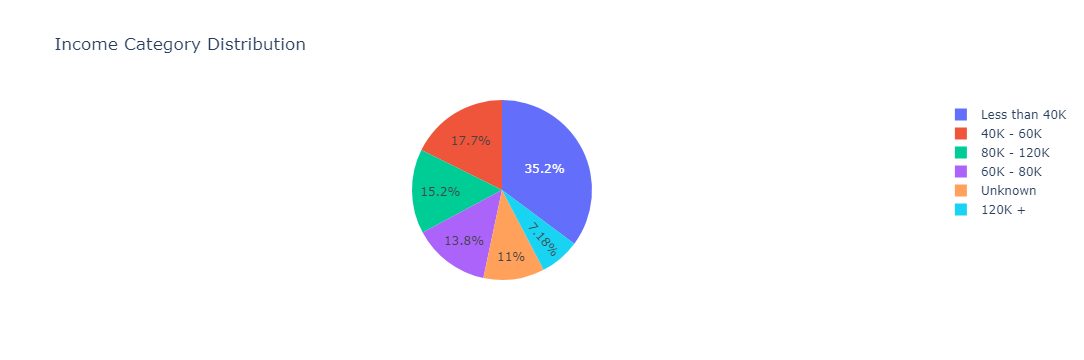

In [10]:
le = LabelEncoder()

def create_pie_chart(values, title):
    counts = values.value_counts()
    fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
    fig.update_layout(title=title)
    fig.show()

# Education Level Pie Chart
create_pie_chart(bank_raw_data.Education_Level, 'Education Level Distribution')

# Marital Status Pie Chart
create_pie_chart(bank_raw_data.Marital_Status , 'Marital Status Distribution')

# Income Category Pie Chart
bank_raw_data.Income_Category = bank_raw_data.Income_Category.str.replace('$','')
create_pie_chart(bank_raw_data.Income_Category.str.replace('$',''), 'Income Category Distribution')

<h4 style="font-style : italic;">📊 Some can decide to use blank filling techniques to fill the unknown values (mode, constant, predictive model, etc....),<br/> however I will let the unknown in the income and Education level stay unknown because they represented a significant proportion of the dataa. 
<br/>🍀➡️As for the Status distribution, we will replace the unknown by the mode  
</h4>


<a id="3"></a>

### 3. Data Analysis

<a id="3.1"></a> 
### 3.1. Data analysis

In [11]:
bank_raw_data["Marital_Status"].replace({"Unknown": bank_raw_data.Marital_Status.mode()[0]}, inplace=True)
bank_raw_data["Marital_Status"].value_counts()

Marital_Status
Married     5436
Single      3943
Divorced     748
Name: count, dtype: int64

<a id="3.2"></a> <p>
### 3.2 Exploratory Data Analysis (EDA)

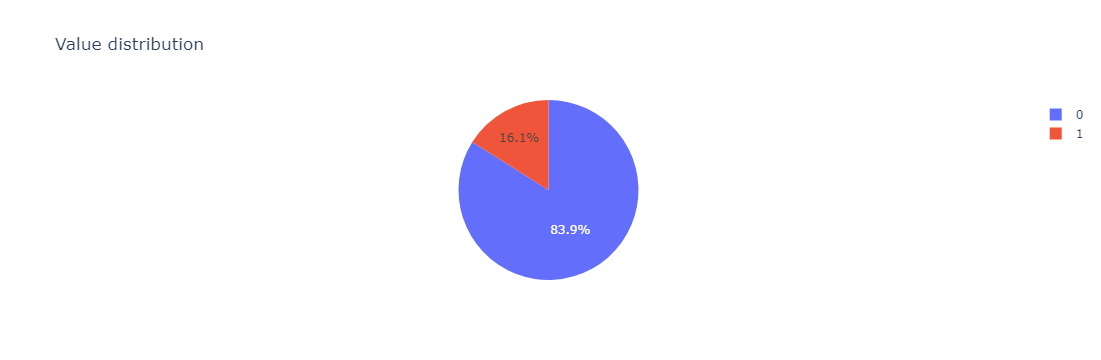

In [12]:
#Firstly le's check the ratio of our sample
counts = bank_raw_data.Churn.value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Value distribution')
fig.show()

🧐 As we could see the dataset is made up of churned customers that represent 16.1% and non-churned customers that represent 83.9 % so the dataset is very imbanlanced, thus must be taken care of before doing classification

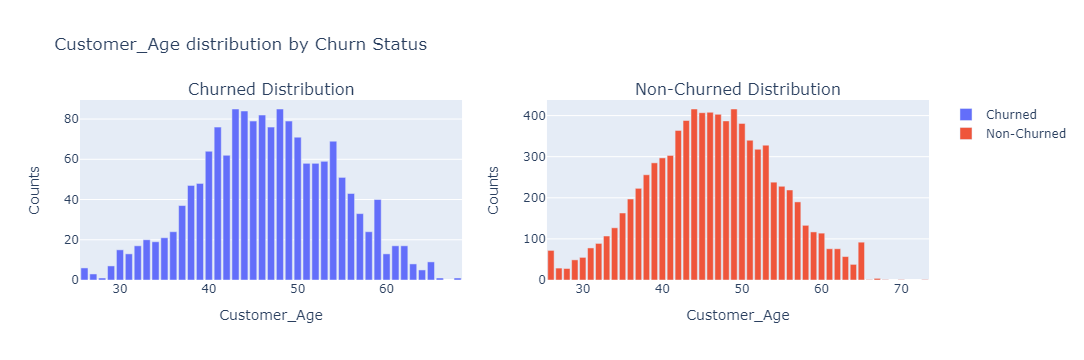

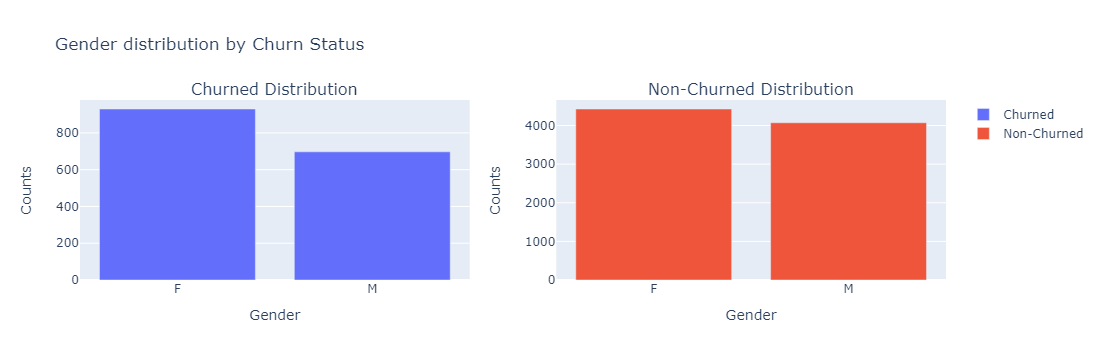

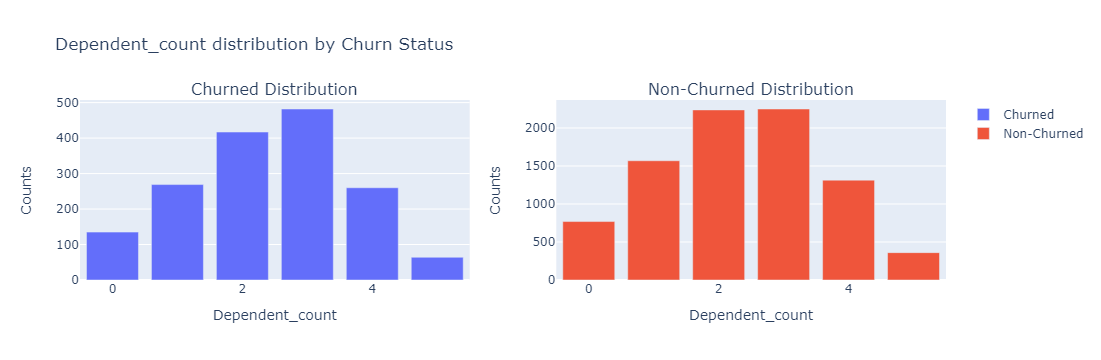

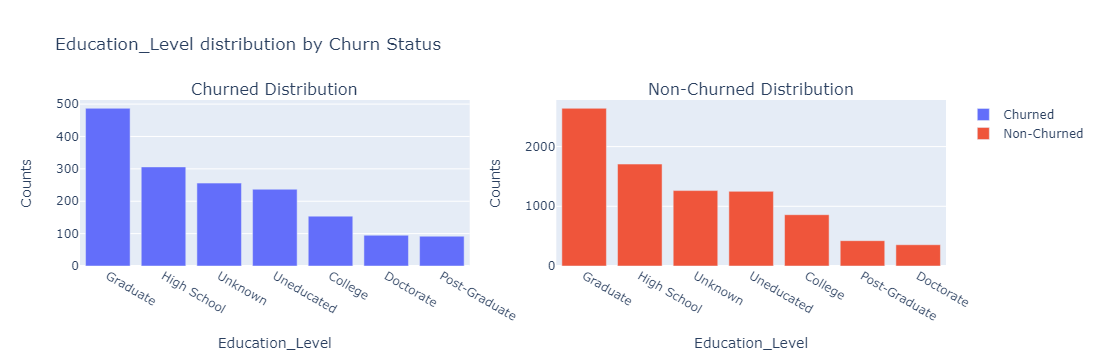

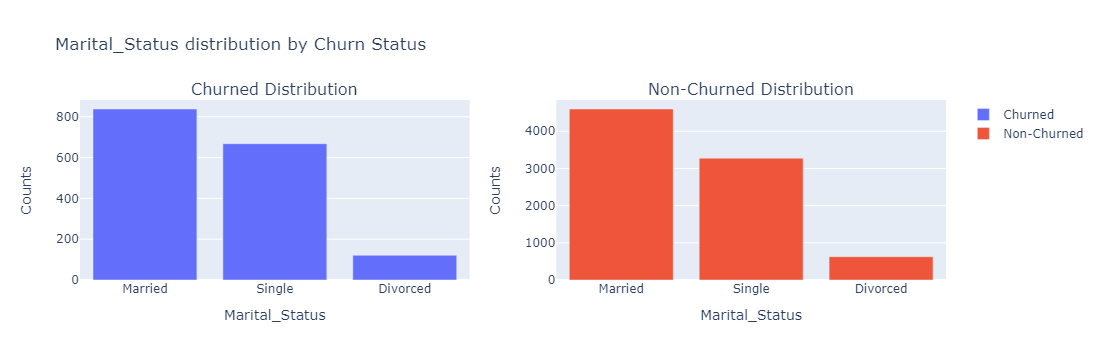

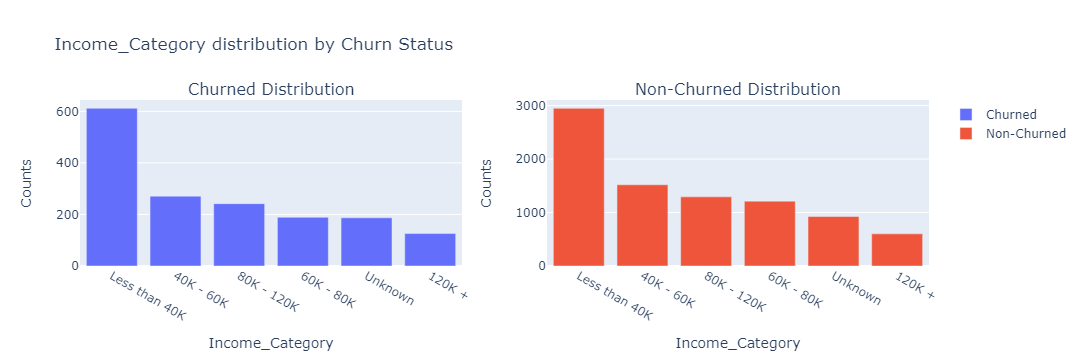

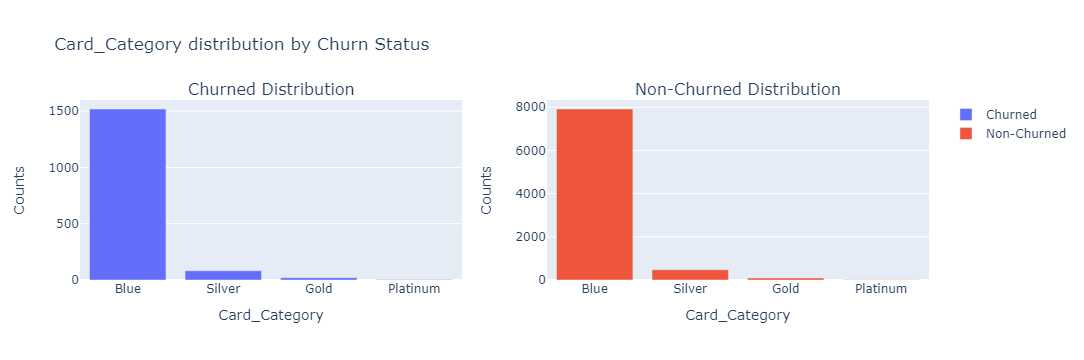

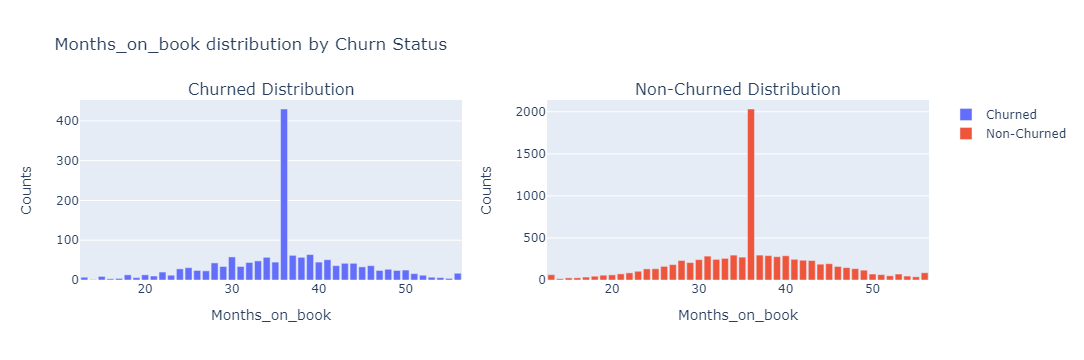

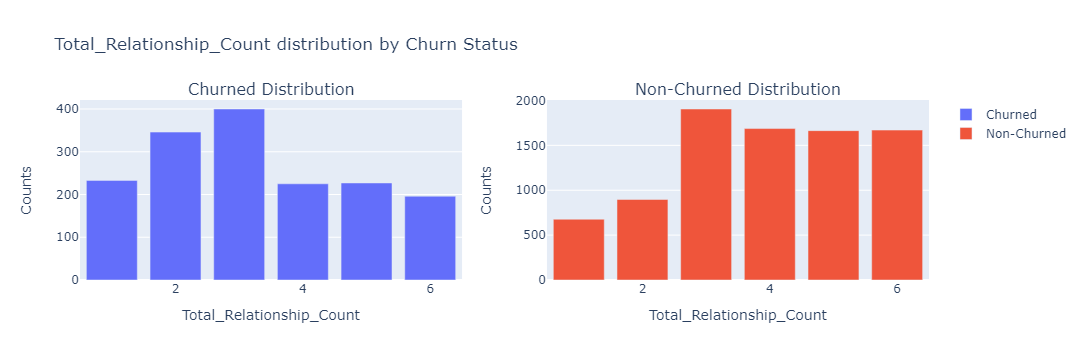

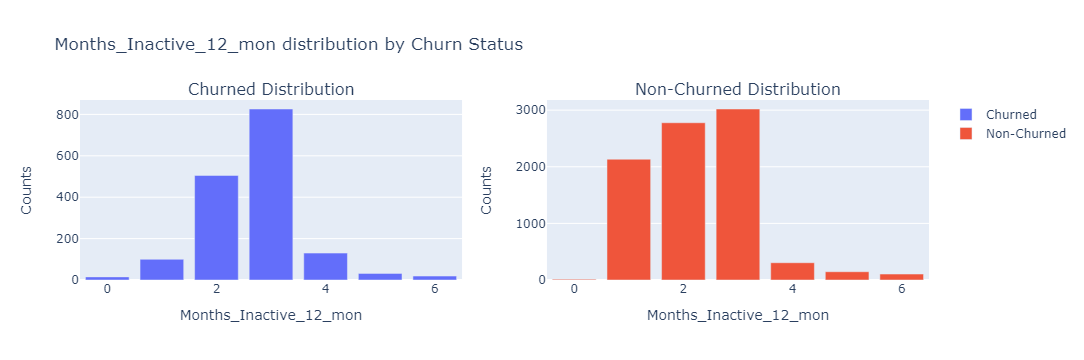

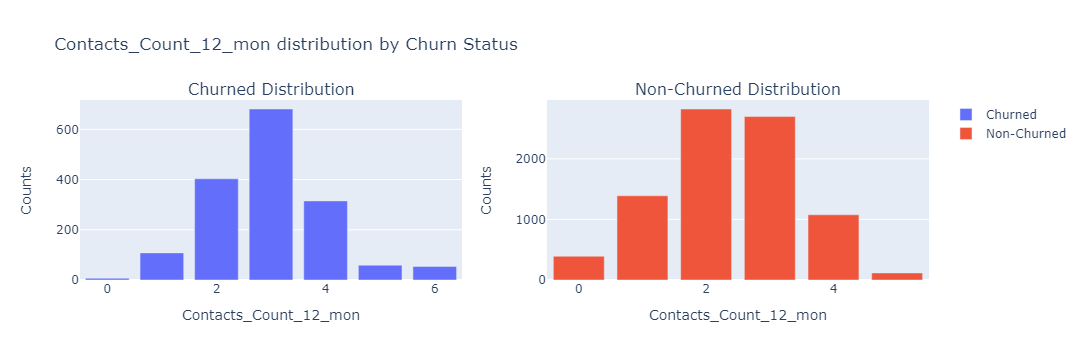

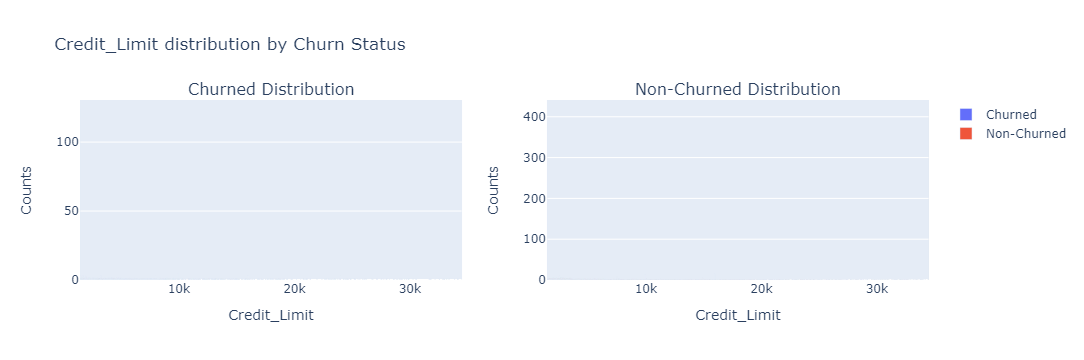

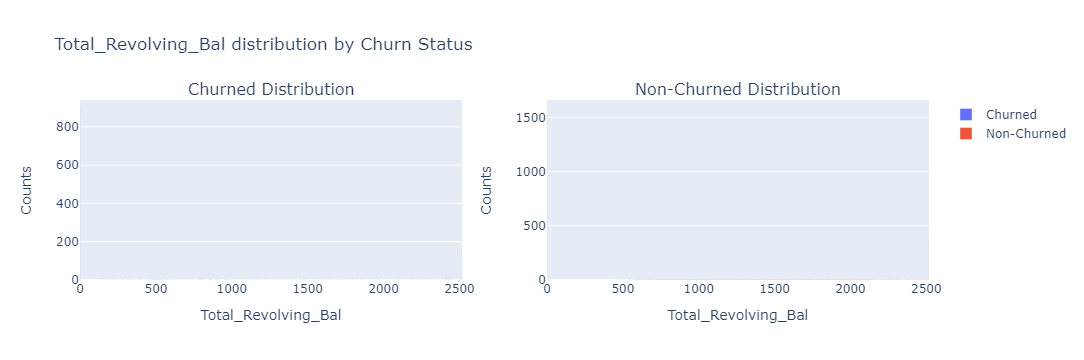

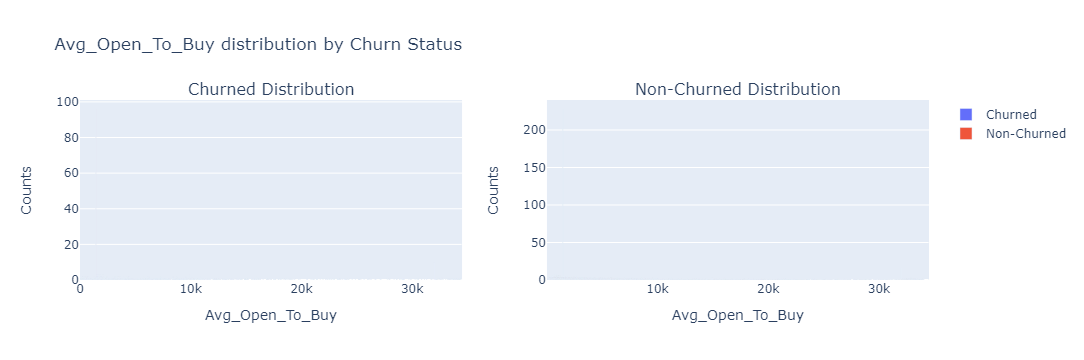

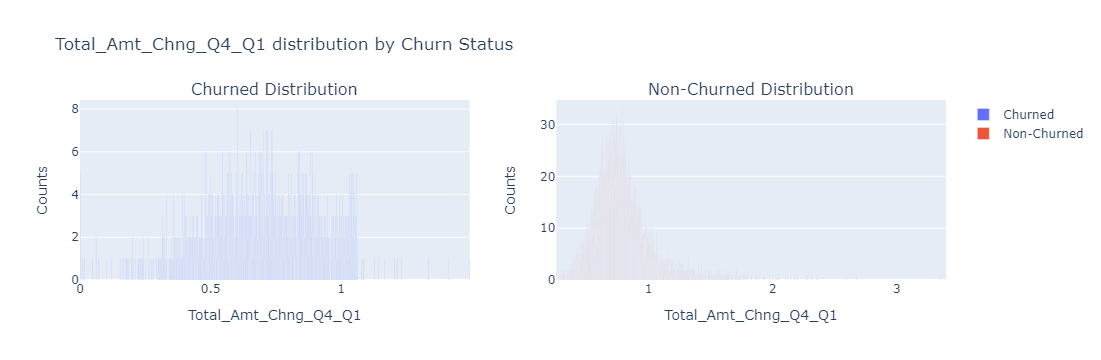

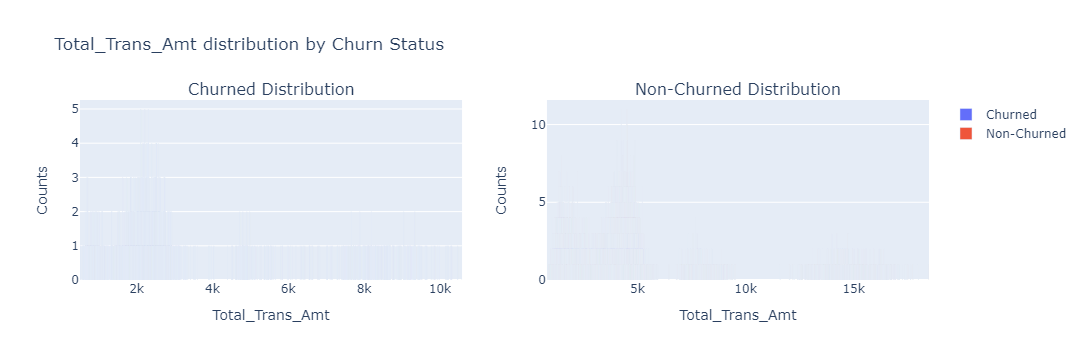

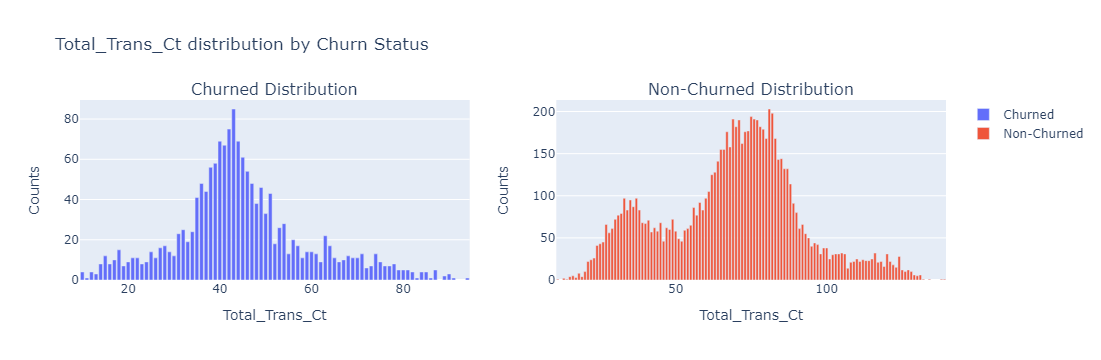

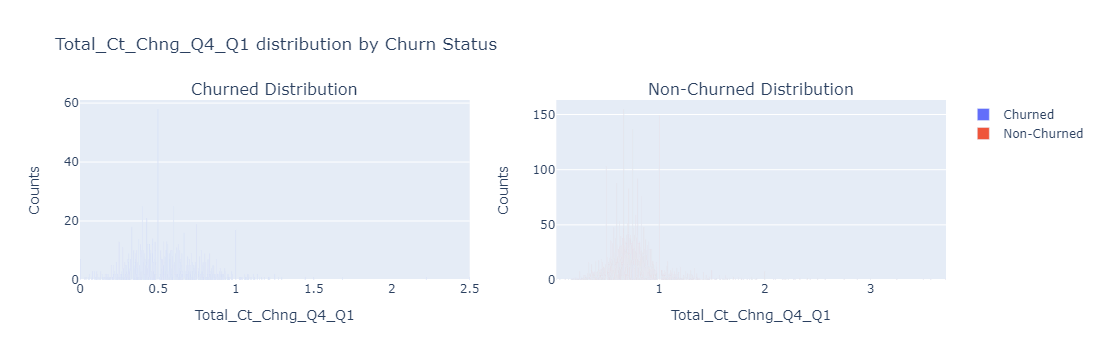

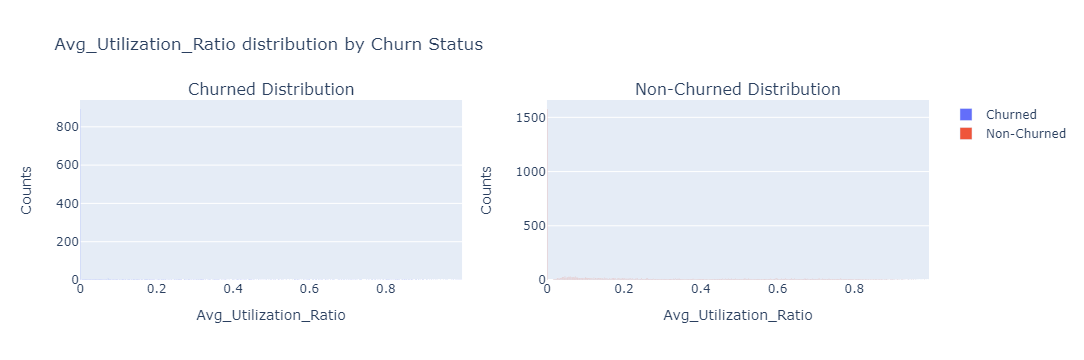

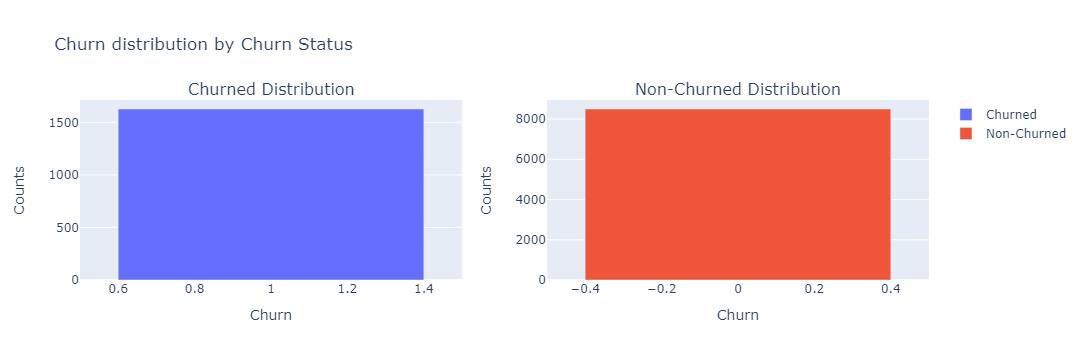

In [13]:
for col in bank_raw_data.columns:
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Churned Distribution", "Non-Churned Distribution"))
    
    for i, churn_status in enumerate([1, 0]):
        counts = bank_raw_data[bank_raw_data['Churn'] == churn_status][col].value_counts()
        fig.add_trace(go.Bar(x=counts.index, y=counts, name='Churned' if churn_status == 1 else 'Non-Churned'), row=1, col=i+1)
    
    fig.update_layout(title=f'{col} distribution by Churn Status', showlegend=True, bargap=0.2)
    fig.update_xaxes(title_text=col)
    fig.update_yaxes(title_text="Counts")
    fig.show()

In [14]:
categorical_columns = bank_raw_data.select_dtypes(include=['object']).columns

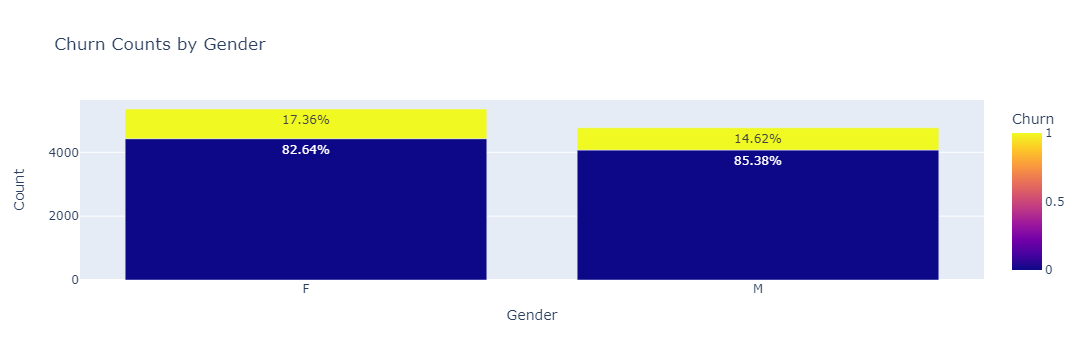

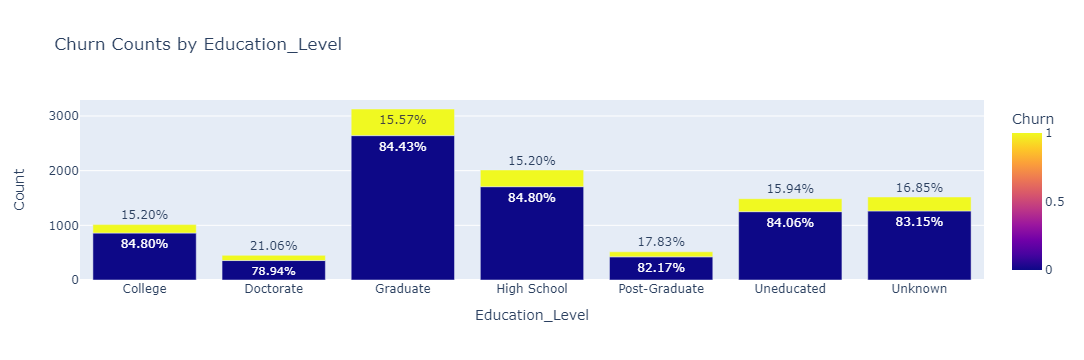

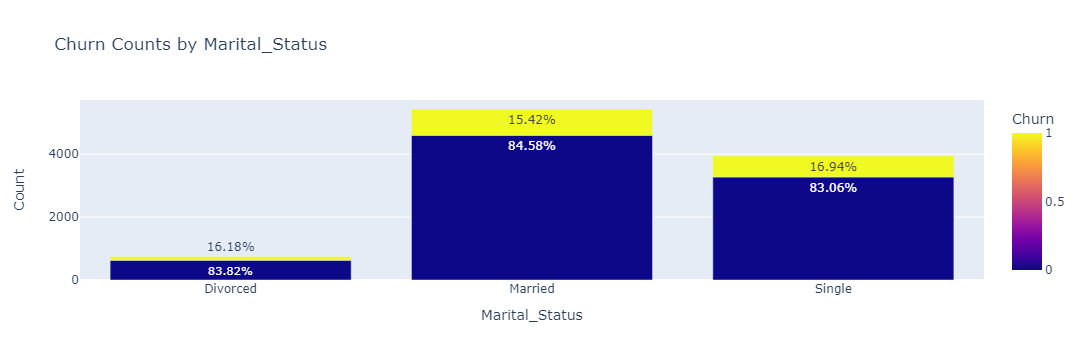

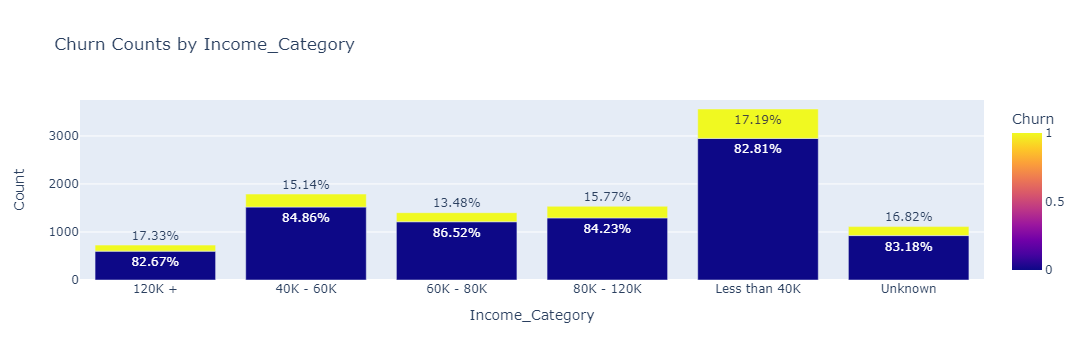

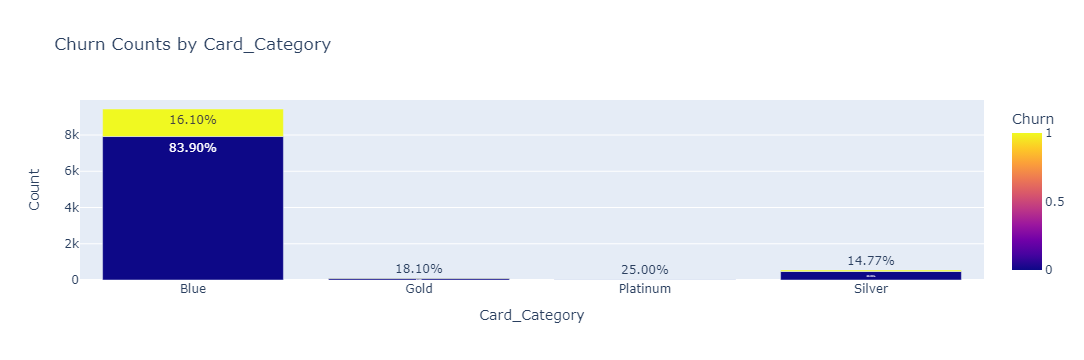

In [15]:
for col in categorical_columns : 
    tmp_df = bank_raw_data.groupby([col, 'Churn']).size().reset_index(name='Count')
    
    # Calculate total counts by Gender for percentage calculation
    total_counts = tmp_df.groupby(col)['Count'].transform('sum')
    
    tmp_df['percentage'] = (tmp_df['Count'] / total_counts) * 100
    
    # Format text for display on the bars
    tmp_df['Ratio'] = tmp_df.apply(lambda row: f'{row["percentage"]:.2f}%', axis=1)
    
    fig = px.bar(tmp_df, x=col, y="Count", color="Churn", text="Ratio", title=f"Churn Counts by {col}")
    
    fig.update_traces(textposition='auto')
    fig.show()
    

🧐 Through the plots above we could observe that : 
* Churning does not vary on the customer age
* Most of the customer using the credit card have low income -Less than 40K) and besides people that earn the most(120K +) they tend to be the ones that churn the most.
* Most of the customer hold the Blue card, and are the one that churn the most
* Women use credit card the most and most of them are the churning people
* The higher is the education level the least credit card is needed, meaning most of the credit card users are the one with lower education level
* Also, married people use credit card the most. However divorced people and single do churn the most

In [16]:
# Filter data for each target category
def plot_kde(colname, bins= 50):
    churned_data = bank_raw_data.loc[bank_raw_data['Churn'] == 1, colname]
    unchurned_data =  bank_raw_data.loc[bank_raw_data['Churn'] == 0, colname]
    
    churned_kde = np.histogram(churned_data, bins=bins, density=True)
    unchurned_kde = np.histogram(unchurned_data, bins=bins, density=True)
    
    fig = go.Figure()
    
    # Add KDE plot for Iris_Setosa
    fig.add_trace(go.Scatter(x=churned_kde[1], y=churned_kde[0], 
                             mode='lines', line=dict(color='red'), fill='tozeroy', 
                             name='Churned'))
    
    # Add KDE plot for Iris_Virginica
    fig.add_trace(go.Scatter(x=unchurned_kde[1], y=unchurned_kde[0], 
                             mode='lines', line=dict(color='blue'), fill='tozeroy', 
                             name='Unchurned'))
    
    # Update layout
    fig.update_layout(title=f'KDE Plot of {colname} by Churn ',
                      xaxis_title=col, yaxis_title='Probability Density')
    
    # Show the plot
    fig.show()

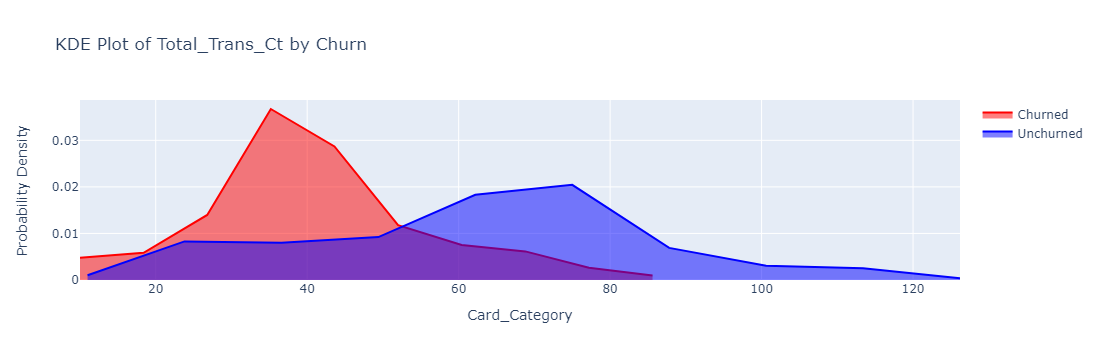

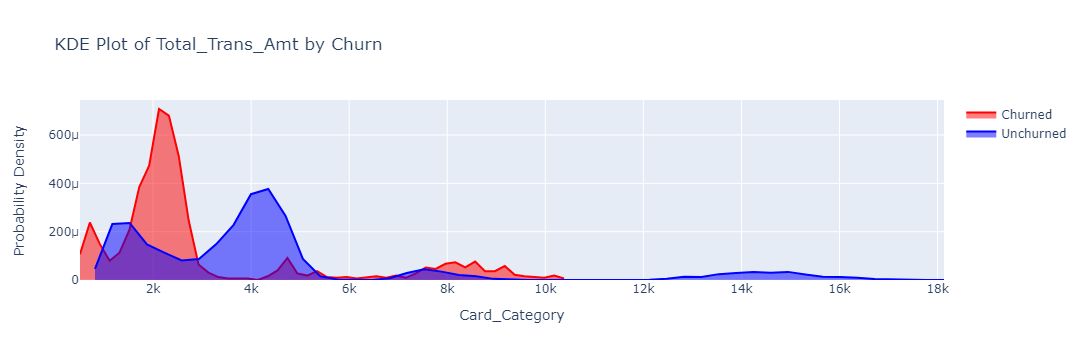

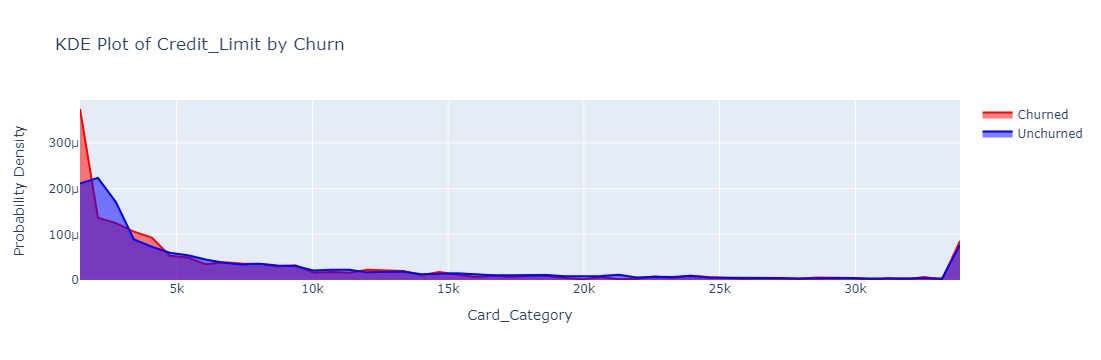

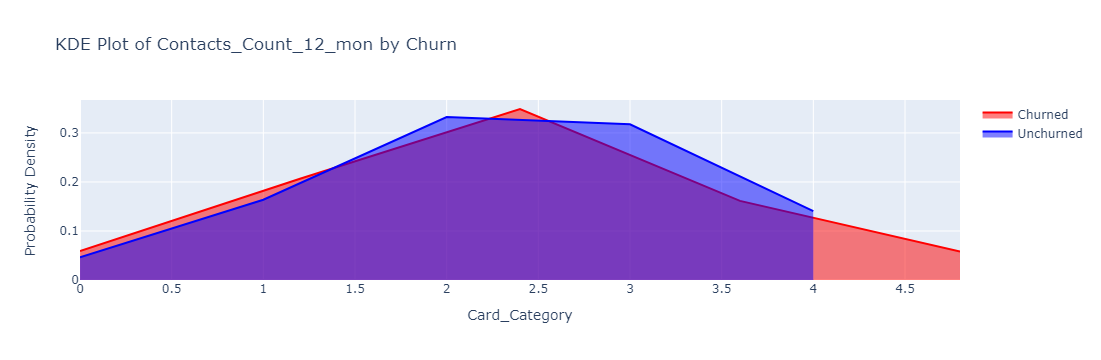

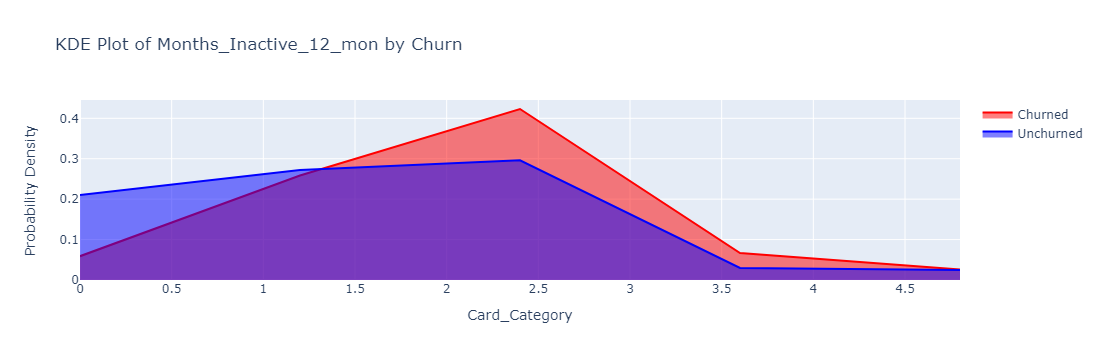

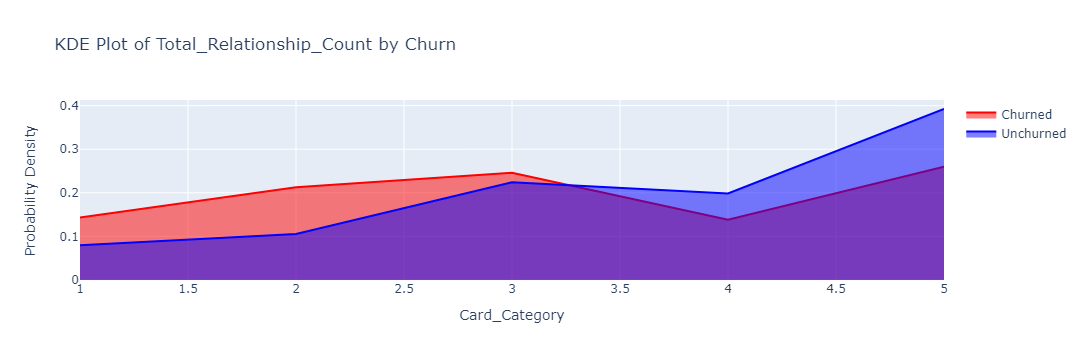

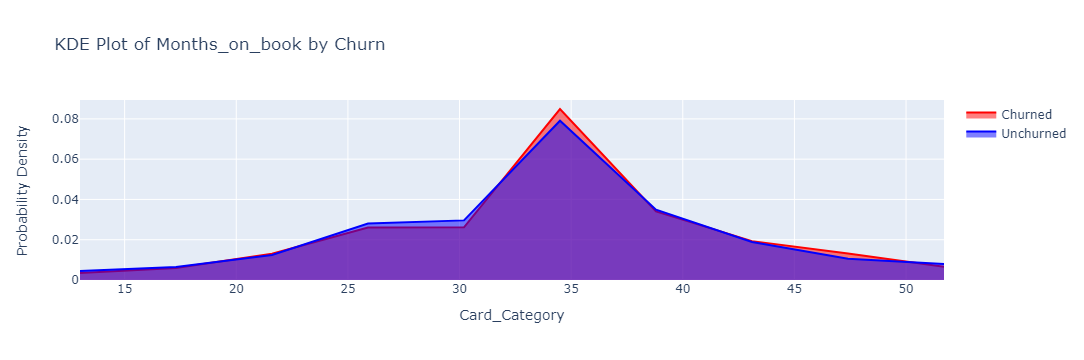

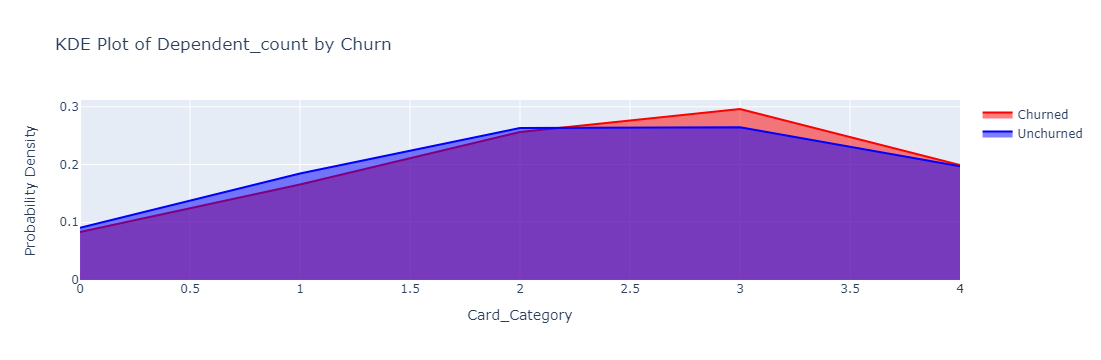

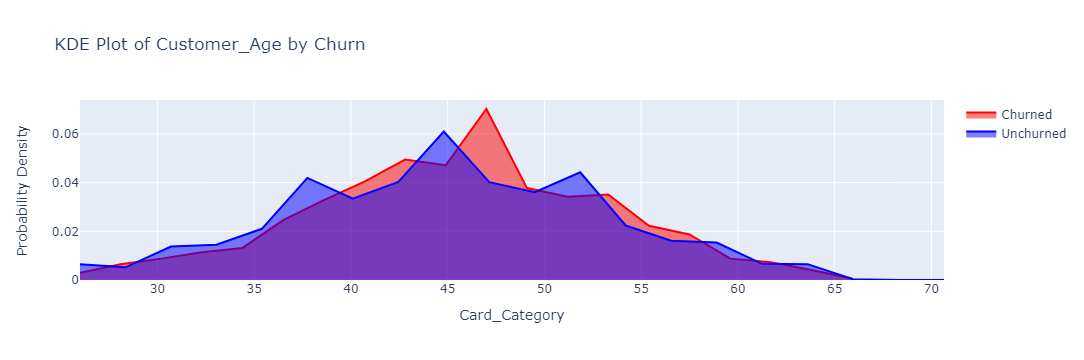

In [17]:
# for a better visualisation, Let's create a dictionary which contains features and the number of bins we want to use to plot them
numeric_columns = {'Total_Trans_Ct': 10, 'Total_Trans_Amt': 50, 
                   'Credit_Limit': 50, 'Contacts_Count_12_mon': 5,'Months_Inactive_12_mon': 5,'Total_Relationship_Count': 5,'Months_on_book': 10, 
                   'Dependent_count': 5, 'Customer_Age': 20}

for feature, bin_size in numeric_columns.items() :
    plot_kde(feature, bin_size)



🧐 **Observations from the Plots:**

- Customers with lower transaction counts tend to churn more frequently.
- Customers with lower transaction amounts also show a higher tendency to churn.
- There is no significant difference observed in terms of credit limit or number of contacts.
- Customers inactive for approximately 2.5 months exhibit a slightly higher churn rate.
- Seniority (months as a customer) does not appear to affect churn behavior.
- Although age does not show a substantial difference, customers aged between 45-50 years tend to churn more  your analysis.

### Feature correlation

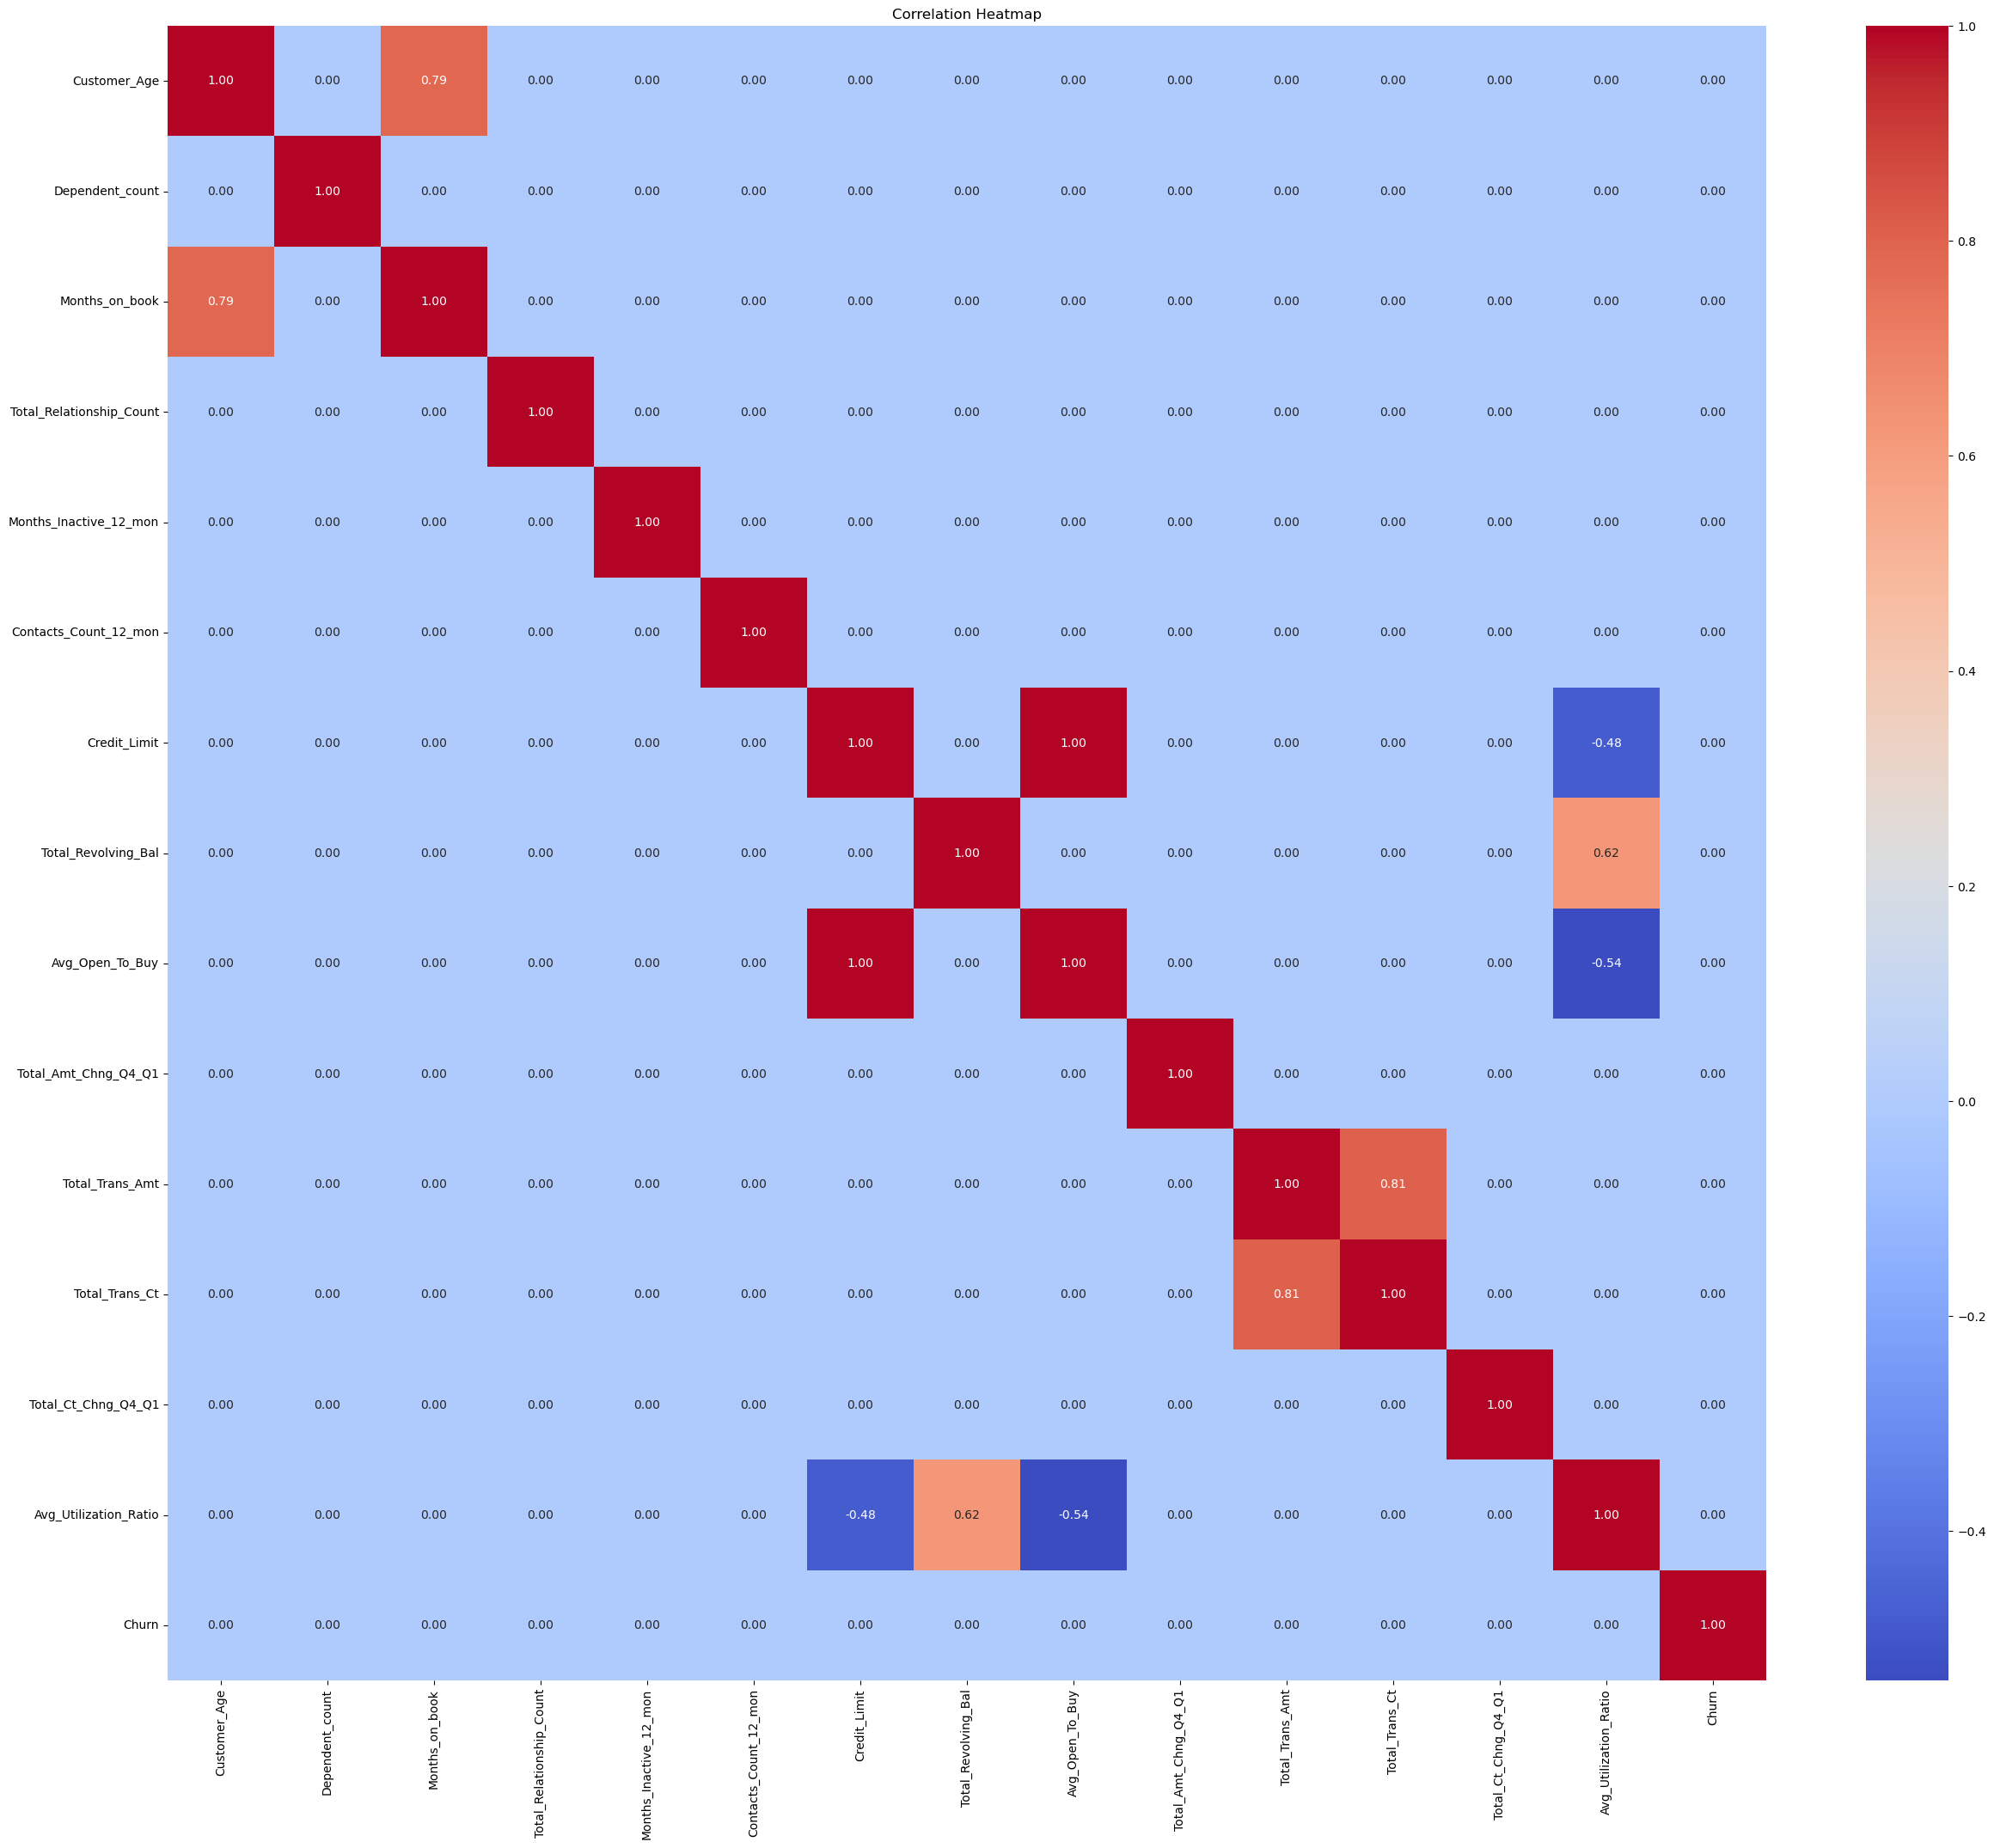

In [18]:
corr_data = bank_raw_data.select_dtypes(exclude=['object']).copy().corr()
corr_data[np.abs(corr_data)<0.4] = 0
# Plotting the heatmap
plt.figure(figsize=(30, 25))  
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

🧐 Given the fact that a correlation is high (according to literature) between two features when its value is >=0.5 or <=0.5; on can say : 

* There is a high correlation between "Customer Age" and "month on book" which is perfectly normal, because as time goes by our seniority increase, so does our month on book
* There is a high correlation between the "Avg_utilisation_ratio" and "Open_to_buy"
* There is an inverse correlation between "Avg_utilisation_ratio" and "credit_limit"; which is also understandable because banks don't trust customer that use their credit cards a lot
* "Total transaction count" and "total transaction amount" are also highly correlated
* "Avg_open_to_Buy" and "Credit limit" also has high correlation.

## Machine Learning 

In order to perform machine learning, high correlated features need to be removed; thus the following features will be removed before creating the model: 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Ct_Chng_Q4_Q1','Months_on_book', 'Total_Trans_Ct'

In [19]:
data = bank_raw_data.drop(['Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Ct_Chng_Q4_Q1','Months_on_book', 'Total_Trans_Ct'], axis=1)
data

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Married   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2         Unknown       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Married   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Total_Relationship_Count  \
0           60K - 80K          Blue                         5   
1       Less than 40K          Blue                         6   
2          80K - 120K          Blue                         4   
3       Less than 40K          Blue                         3   
4           60K - 80K          Blue                         5   
...               ...           ...                       ...   
10122       40K - 60K          Blue                         3   
10123       40K - 60K          Blue                         4   
10124   Less than 40K          Blue                         5   
10125       40K - 60K          Blue                         4   
10126   Less than 40K        Silver                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Amt_Chng_Q4_Q1  \
0                           1                      3                 1.335   
1                           1                      2                 1.541   
2                           1                      0                 2.594   
3                           4                      1                 1.405   
4                           1                      0                 2.175   
...                       ...                    ...                   ...   
10122                       2                      3                 0.703   
10123                       2                      3                 0.804   
10124                       3                      4                 0.819   
10125                       3                      3                 0.535   
10126                       2                      4                 0.703   

       Total_Trans_Amt  Avg_Utilization_Ratio  Churn  
0                 1144                  0.061      0  
1                 1291                  0.105      0  
2                 1887                  0.000      0  
3                 1171                  0.760      0  
4                  816                  0.000      0  
...                ...                    ...    ...  
10122            15476                  0.462      0  
10123             8764                  0.511      1  
10124            10291                  0.000      1  
10125             8395                  0.000      1  
10126            10294                  0.189      1  

[10127 rows x 14 columns]

In [20]:
# divide features and label , encode label
X = data.drop(columns = ['Churn'])
y = data['Churn'].values
X.head()

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0            45      M                3     High School        Married   
1            49      F                5        Graduate         Single   
2            51      M                3        Graduate        Married   
3            40      F                4     High School        Married   
4            40      M                3      Uneducated        Married   

  Income_Category Card_Category  Total_Relationship_Count  \
0       60K - 80K          Blue                         5   
1   Less than 40K          Blue                         6   
2      80K - 120K          Blue                         4   
3   Less than 40K          Blue                         3   
4       60K - 80K          Blue                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Amt_Chng_Q4_Q1  \
0                       1                      3                 1.335   
1                       1                      2                 1.541   
2                       1                      0                 2.594   
3                       4                      1                 1.405   
4                       1                      0                 2.175   

   Total_Trans_Amt  Avg_Utilization_Ratio  
0             1144                  0.061  
1             1291                  0.105  
2             1887                  0.000  
3             1171                  0.760  
4              816                  0.000

In [25]:

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = [i for i in X.columns if i not in categorical_columns ]

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

X

Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0                45       1                3                3               1   
1                49       0                5                2               2   
2                51       1                3                2               1   
3                40       0                4                3               1   
4                40       1                3                5               1   
...             ...     ...              ...              ...             ...   
10122            50       1                2                2               2   
10123            41       1                2                6               0   
10124            44       0                1                3               1   
10125            30       1                2                2               1   
10126            43       0                2                2               1   

       Income_Category  Card_Category  Total_Relationship_Count  \
0                    2              0                         5   
1                    4              0                         6   
2                    3              0                         4   
3                    4              0                         3   
4                    2              0                         5   
...                ...            ...                       ...   
10122                1              0                         3   
10123                1              0                         4   
10124                4              0                         5   
10125                1              0                         4   
10126                4              3                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Amt_Chng_Q4_Q1  \
0                           1                      3                 1.335   
1                           1                      2                 1.541   
2                           1                      0                 2.594   
3                           4                      1                 1.405   
4                           1                      0                 2.175   
...                       ...                    ...                   ...   
10122                       2                      3                 0.703   
10123                       2                      3                 0.804   
10124                       3                      4                 0.819   
10125                       3                      3                 0.535   
10126                       2                      4                 0.703   

       Total_Trans_Amt  Avg_Utilization_Ratio  
0                 1144                  0.061  
1                 1291                  0.105  
2                 1887                  0.000  
3                 1171                  0.760  
4                  816                  0.000  
...                ...                    ...  
10122            15476                  0.462  
10123             8764                  0.511  
10124            10291                  0.000  
10125             8395                  0.000  
10126            10294                  0.189  

[10127 rows x 13 columns]

In [27]:
#split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RandomForestClassifier(random_state=42)

Classifier: KNN
Accuracy: 0.8588
F1 Score: 0.3673

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1701
           1       0.65      0.26      0.37       325

    accuracy                           0.86      2026
   macro avg       0.76      0.61      0.64      2026
weighted avg       0.84      0.86      0.83      2026



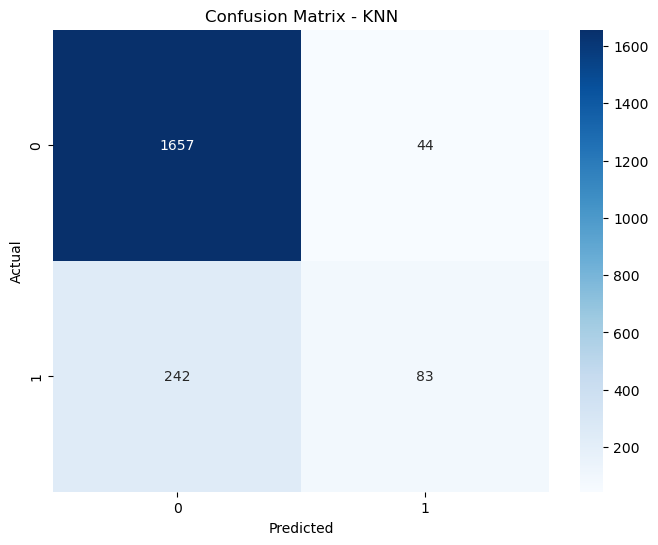


------------------------------------------------------

Classifier: Random Forest
Accuracy: 0.9334
F1 Score: 0.7660

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1701
           1       0.88      0.68      0.77       325

    accuracy                           0.93      2026
   macro avg       0.91      0.83      0.86      2026
weighted avg       0.93      0.93      0.93      2026



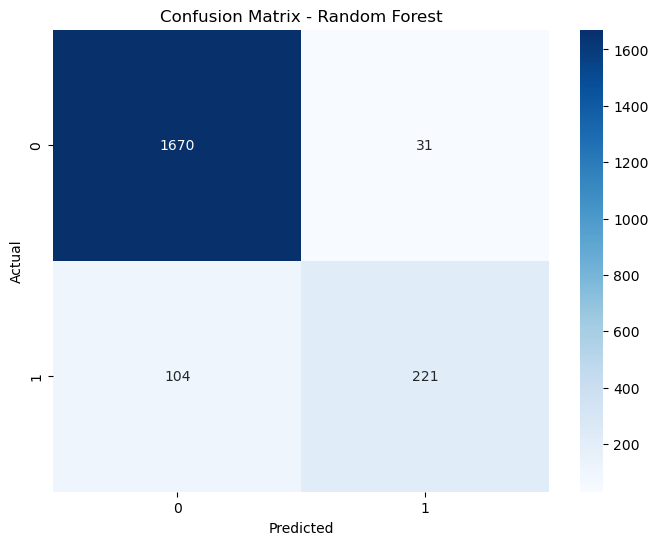


------------------------------------------------------

Classifier: C5.0 Decision Tree
Accuracy: 0.9265
F1 Score: 0.7732

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1701
           1       0.77      0.78      0.77       325

    accuracy                           0.93      2026
   macro avg       0.86      0.87      0.86      2026
weighted avg       0.93      0.93      0.93      2026



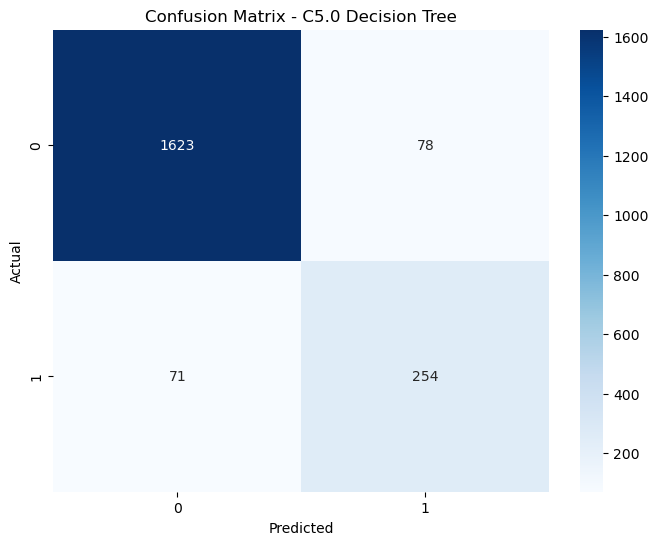


------------------------------------------------------

Classifier: SVM
Accuracy: 0.8830
F1 Score: 0.4791

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1701
           1       0.84      0.34      0.48       325

    accuracy                           0.88      2026
   macro avg       0.86      0.66      0.71      2026
weighted avg       0.88      0.88      0.86      2026



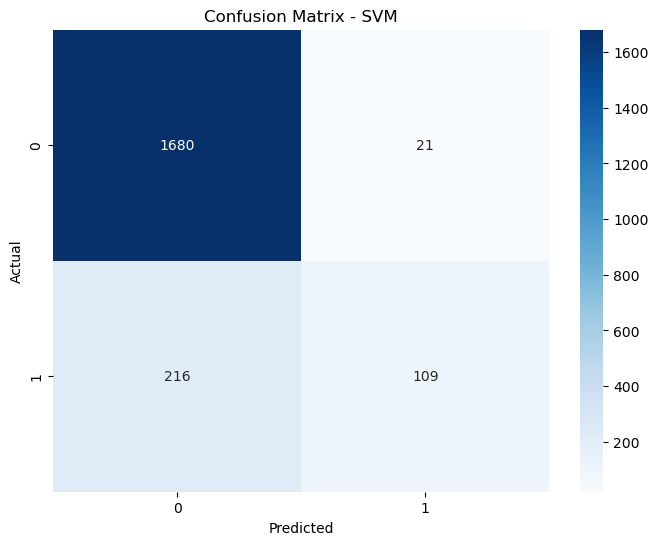


------------------------------------------------------

Classifier: Linear Regression
Accuracy: 0.8697
F1 Score: 0.3973

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1701
           1       0.77      0.27      0.40       325

    accuracy                           0.87      2026
   macro avg       0.82      0.63      0.66      2026
weighted avg       0.86      0.87      0.84      2026



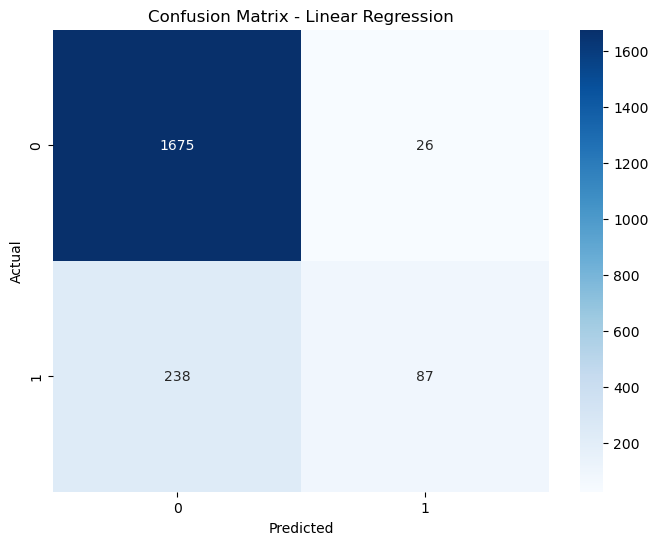


------------------------------------------------------

[LightGBM] [Info] Number of positive: 1302, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160721 -> initscore=-1.652874
[LightGBM] [Info] Start training from score -1.652874
Classifier: LightGBM
Accuracy: 0.9531
F1 Score: 0.8465

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1701
           1       0.89      0.81      0.85       325

    accuracy                           0.95      2026
   macro avg       0.93      0.89      0.91      2026
weighted avg       0.95      0.95     

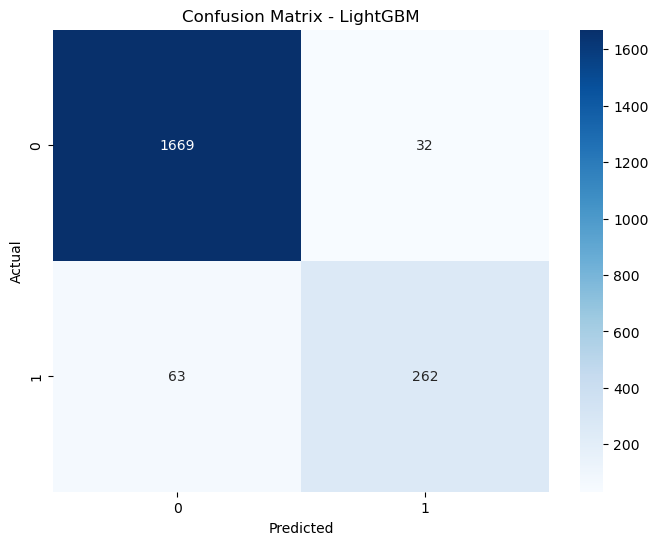


------------------------------------------------------

Classifier: Naive Bayes
Accuracy: 0.8603
F1 Score: 0.3807

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1701
           1       0.66      0.27      0.38       325

    accuracy                           0.86      2026
   macro avg       0.77      0.62      0.65      2026
weighted avg       0.84      0.86      0.83      2026



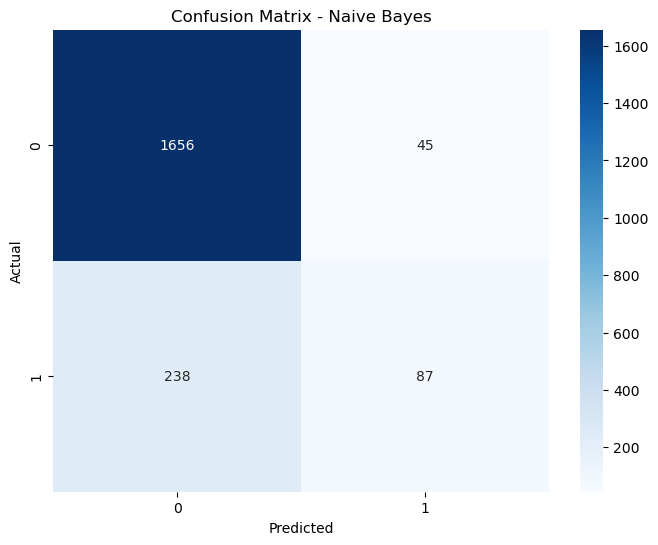


------------------------------------------------------



In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB


# Define classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'C5.0 Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Linear Regression': LogisticRegression(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Initialize empty dictionaries to store results
accuracy_scores = {}
f1_scores = {}

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled, y_train)
    
    # Predictions on test set
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store scores in dictionaries
    accuracy_scores[clf_name] = accuracy
    f1_scores[clf_name] = f1
    
    # Print scores and metrics
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n------------------------------------------------------\n")


We can observe that LightGBM followed by random forest had the highest results 95,31% vs 93.34% in term of accuracy and 84.65 vs 76.60% in term of f1 score. Since our dataset is imbalanced f1-score is better to use in this case. 

Thus those model can be tuned to determine the final model suitable to resolve the problem of this project.

In order to do so, let's use a Grid search to find the most optimized parameters for each algorithm

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\adnaa\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Best Parameters for Random Forest:
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy Score: 0.9437
Tuned Random Forest Model Performance:
Accuracy: 0.9363
F1 Score: 0.7787

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1701
           1       0.88      0.70      0.78       325

    accuracy                           0.94      2026
   macro avg       0.91      0.84      0.87      2026
weighted avg       0.93      0.94      0.93      2026



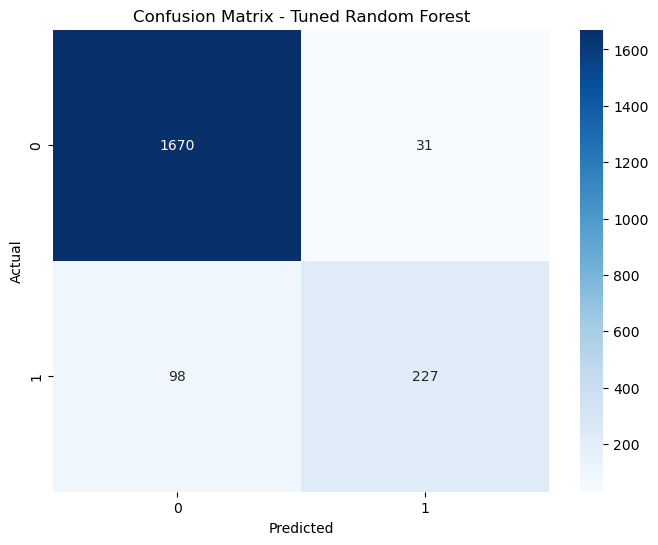

In [35]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']   # Number of features to consider when looking for the best split
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, 
                              scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Perform Grid Search CV
grid_search_rf.fit(X_train_scaled, y_train)

print("Best Parameters for Random Forest:")
print(grid_search_rf.best_params_)
print(f"Best Accuracy Score: {grid_search_rf.best_score_:.4f}")

# the best model
best_rf_classifier = grid_search_rf.best_estimator_

# Predictions on test set using the best model
y_pred_rf = best_rf_classifier.predict(X_test_scaled)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print metrics
print(f"Tuned Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Info] Number of positive: 1302, number of negative: 6799
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160721 -> initscore=-1.652874
[LightGBM] [Info] Start training from score -1.652874

Best Parameters for LightGBM:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300, 'num_leaves': 40}
Best Accuracy Score: 0.9557
Tuned LightGBM Model Performance:
Accuracy: 0.9536
F1 Score: 0.8459

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1701
           1       0.91      0.79      0.85       325

    accuracy               

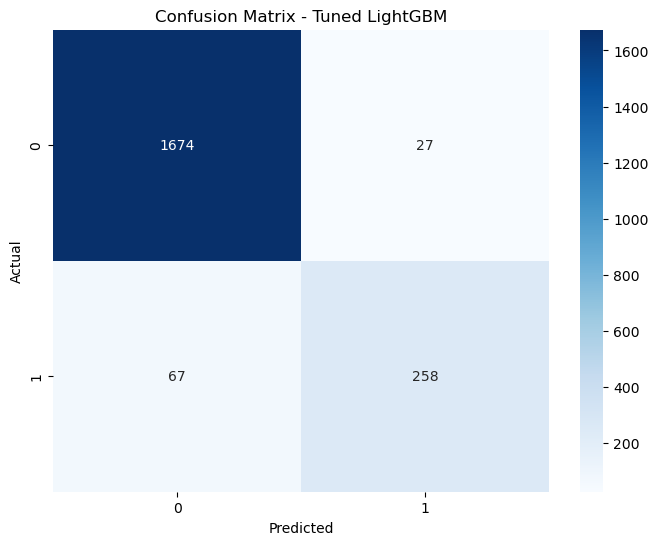

In [37]:
param_grid_lgb = {
    'num_leaves': [20, 30, 40],              # Maximum number of leaves in one tree
    'max_depth': [-1, 10, 20],               # Maximum depth of tree. -1 means no limit
    'learning_rate': [0.1, 0.05, 0.01],      # Learning rate for training
    'n_estimators': [100, 200, 300],         # Number of boosting iterations
    'colsample_bytree': [0.8, 0.9, 1.0]      # Fraction of features to be randomly sampled for each tree
}
lgb_classifier = LGBMClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_lgb = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid_lgb, 
                               scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_lgb.fit(X_train_scaled, y_train)
print("\nBest Parameters for LightGBM:")
print(grid_search_lgb.best_params_)
print(f"Best Accuracy Score: {grid_search_lgb.best_score_:.4f}")

# Best estimator (model) after hyperparameter tuning
best_lgb_classifier = grid_search_lgb.best_estimator_

# Predictions on test set
y_pred_lgb = best_lgb_classifier.predict(X_test_scaled)

# Calculate metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print(f"Tuned LightGBM Model Performance:")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"F1 Score: {f1_lgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Tuned LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h3 style='color: green'>As a conclusion, with fhis very final result Light GBM model can be choosen as the best model to predict Credit card churn</h3>